In [ ]:
# Standard library
import random

# Third-party libraries
import numpy as np
# Definición de la clase Network

def feedforward(x,bias,weight):
    """Return the output of the network if ``a`` is input."""

    print("w")
    print(weight)
    print("x")
    print(x)
    print("b")
    print(bias)
    for b, w in zip(bias, weight):
        z=np.dot(w, x)+b
        a = sigmoid(z)
    print('a')
    print(a)

    return a

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

#Crear la red neuronal e inicializando valores aleatorios
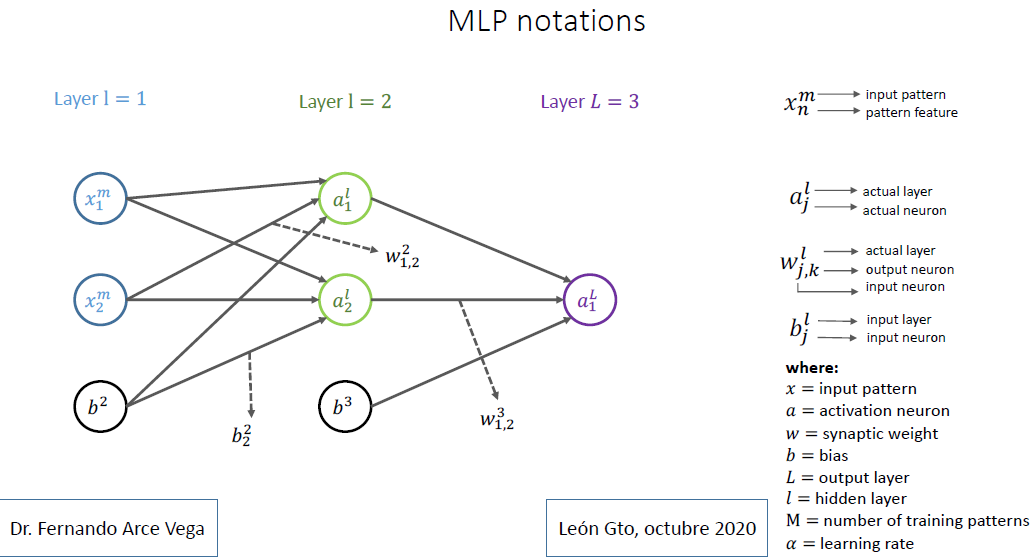


In [ ]:
import numpy as np
sizes = [2,2,1]
num_layers = len(sizes)
#weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
weights = [np.array([[ 0.00771645, -0.87215412],[-0.8828999 ,  0.91634591]]), np.array([[-0.27296355, -0.16419596]])]
print("weights: w[input neuron,output neuron]  ---  [[w_1,1^2][w_1,2^2]][[w_2,1^2][w_2,2^2]] ---  [[w_1,1^3][w_1,2^3]] [2, 2] [2, 1]")
print(sizes[:-1], sizes[1:]) # [:-1] desde el inicio hasta el ultimo (sin incluirlo) [2,2] (desde el primero sin el ultimo)
print(weights)

#biases = [np.random.randn(y,1) for y in sizes[1:]]
biases = [np.array([[-0.37810527], [ 0.30153513]]), np.array([[0.83487797]])]
print("biases: b[input layer,input neuron] --- [[b_1^2] [b_2^2]] [[b_1^3]] --- [2, 1]")
print(sizes[1:]) # [1:] desde el indice 1 hasta el ultimo [2,1]
print(biases)


weights: w[input neuron,output neuron]  ---  [[w_1,1^2][w_1,2^2]][[w_2,1^2][w_2,2^2]] ---  [[w_1,1^3][w_1,2^3]] [2, 2] [2, 1]
[2, 2] [2, 1]
[array([[ 0.00771645, -0.87215412],
       [-0.8828999 ,  0.91634591]]), array([[-0.27296355, -0.16419596]])]
biases: b[input layer,input neuron] --- [[b_1^2] [b_2^2]] [[b_1^3]] --- [2, 1]
[2, 1]
[array([[-0.37810527],
       [ 0.30153513]]), array([[0.83487797]])]


In [ ]:
print('1. Inicializar los patrones de entrada x con sus respectivos objetivos t:')
X = np.array(#[0,0]),
              #[0,1]#,
              #[1,0]#,
              #[1,1]#]
             )
print('x= \n{}'.format(X))
t = np.array(#[[1]])#,
              #[0]#,
              #[0]#,
              [1]#]
             )
print('t= \n{}'.format(t))
alpha=0.5



1. Inicializar los patrones de entrada x con sus respectivos objetivos t:
x= 
[1 1]
t= 
[1]


##1. Feed-forward: pasar el patron de entrada por todas la capas
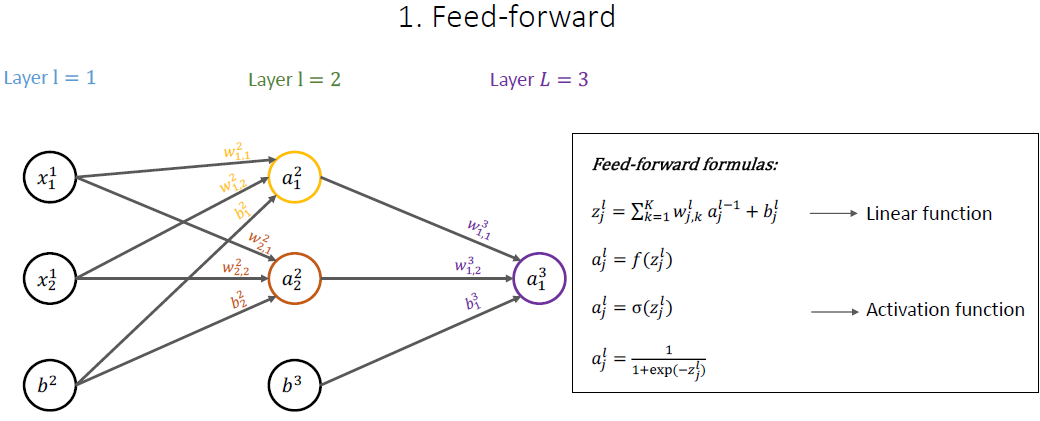

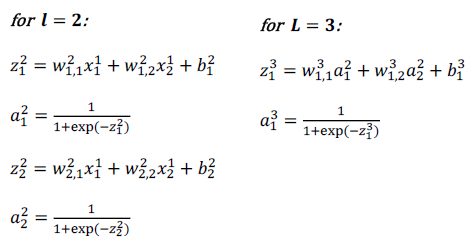

In [ ]:
# 1. Feed-forward: pasar el patron de entrada por todas la capas
dC_db = [np.zeros(b.shape) for b in biases]
dC_dw = [np.zeros(w.shape) for w in weights]

#for x in X:
#    print(x)
#    a=feedforward(x,biases,weights)
a_list = [X] # list to store all the activations, layer by layer
z_list = [] # list to store all the z vectors, layer by layer

for b, w in zip(biases, weights):  #<----- problema
    z = np.dot(w,a_list[-1].transpose())+b.transpose()
    z_list.append(z)
    a = sigmoid(z)
    a_list.append(a)

print("a_list = ")
print(a_list)

a_list = 
[array([1, 1]), array([[0.22864508, 0.58885516]]), array([[0.61495487]])]


##2. Output error

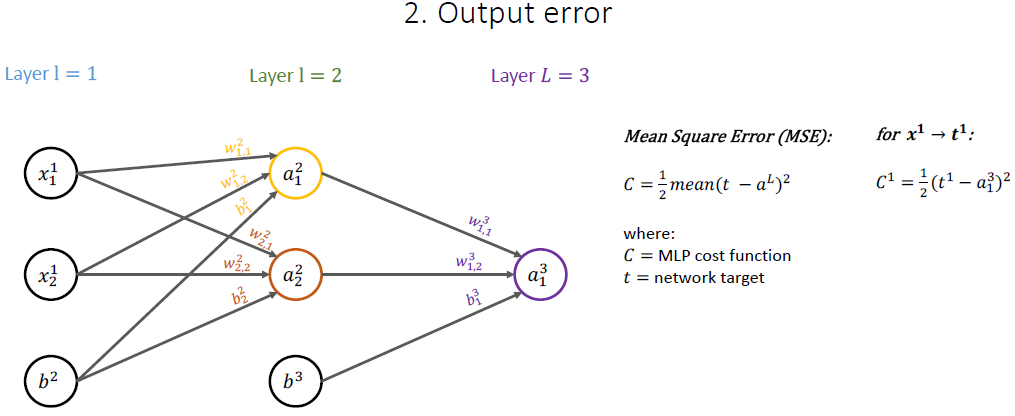

In [ ]:
# 2. output error
C = (0.5*(t-a_list[-1])**2)#.mean(axis=0) #indice [-1] significa el último elemento de la lista, correspondiente a la última capa
print(C)

[[0.07412988]]


##3. Back Propagation (BP)

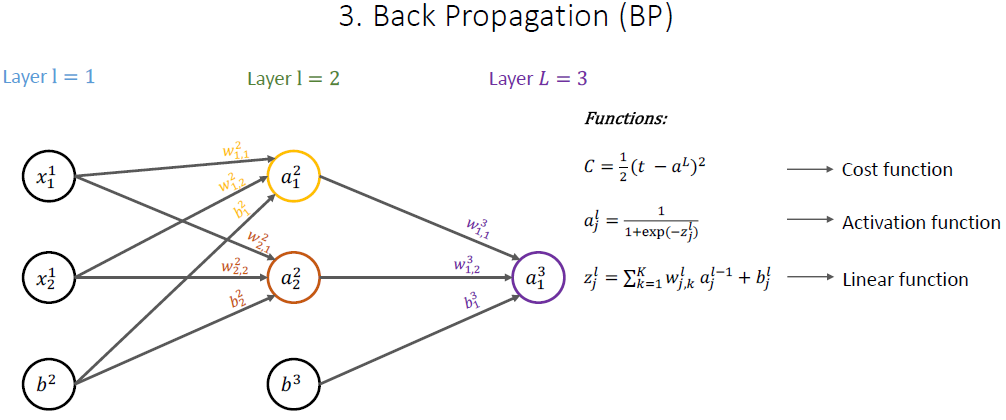



##3.1 BP: output layer error ($\delta_j^L$)

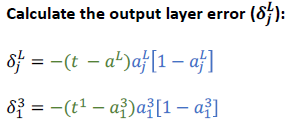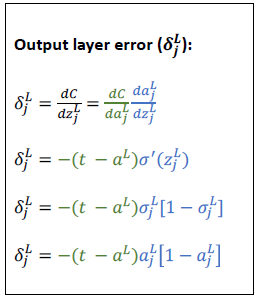

In [ ]:
delta_list = []
#print(z_list)
delta_L = -np.dot((t-a_list[-1]),sigmoid_prime(z_list[-1])) #delta^L = [delta_1^3]
#print((target-activations[-1]))
#print(sigmoid_prime(z[-1]))
#print("delta_L = -({}-{})".format(target,activations[-1]),"* {}".format(sigmoid_prime(z[-1]))," = {}".format(delta_L))
print("delta L = {}".format(delta_L)) # [delta_1^3]
delta_list.append(delta_L[0])
print(delta_list)

delta L = [[-0.09117306]]
[array([-0.09117306])]


#3.2 BP: calcular la actualizacion de los pesos y bias ($w_{j,k}^{L^{new}},b_{j}^{L^{new}}$)
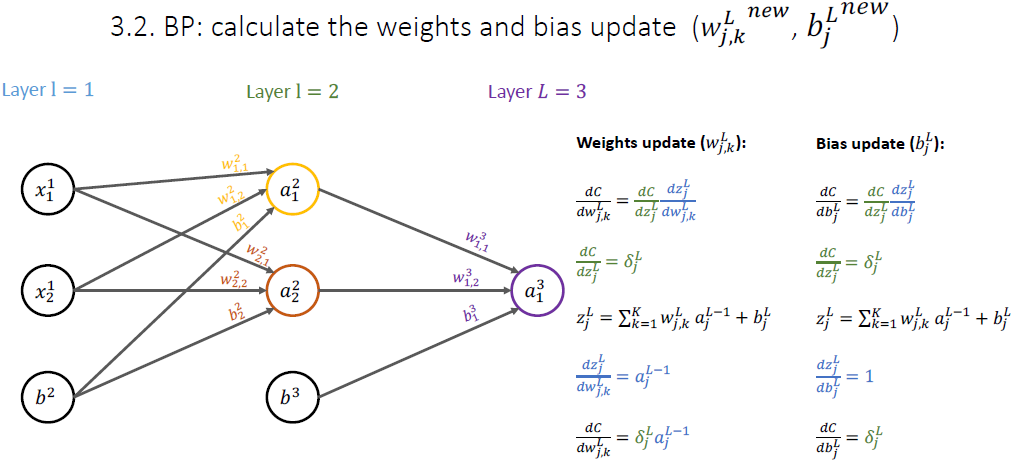 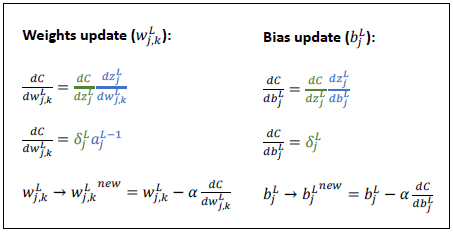 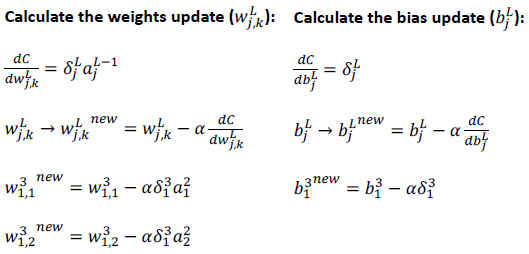

In [ ]:
#  3.2 BP: calcular la actualizacion de los pesos y bias en L
print(delta_list)
dC_dw[-1] = np.dot(delta_list[-1], a_list[-2]) #1x1 1x4 = 1x4
print(dC_dw[-1])

[array([-0.09117306])]
[-0.02084627 -0.05368772]


In [ ]:
dC_dw[-1] = np.dot(delta_L, a_list[-2]) #1x1 1x4 = 1x4
#print("dC_dw")
#print(dC_dw[-1])
#print("weights")
#print(weights)
w_new = weights[-1] - np.dot(alpha,dC_dw[-1]) # 1x2   [w_1,1^3][w_1,2^3] ---> new
print('new weights: ')
print(w_new)

dC_db[-1] = delta_L #1x1
#print("dc_db")
#print(dC_db[-1])
#print(biases[-1])
b_new = biases[-1]  - np.dot(alpha,dC_db[-1])   # [b_1^3] --> new
print('new bias: ')
print(b_new)

#print("weights antes")
#print(weights)

#print("biases antes")
#print(biases)

#biases[-1] = b_new   #1x1
#weights[-1] = w_new  #1x2

#print("weights despues")
##print(weights)

##print("biases despues")
#print(biases)

new weights: 
[[-0.30922056 -0.22098369]]
new bias: 
[[0.73279435]]


In [ ]:
biases[-1] = b_new   #1x1
weights[-1] = w_new  #1x2

##3.3 BP: error de la capa oculta ($\delta_j^l$)
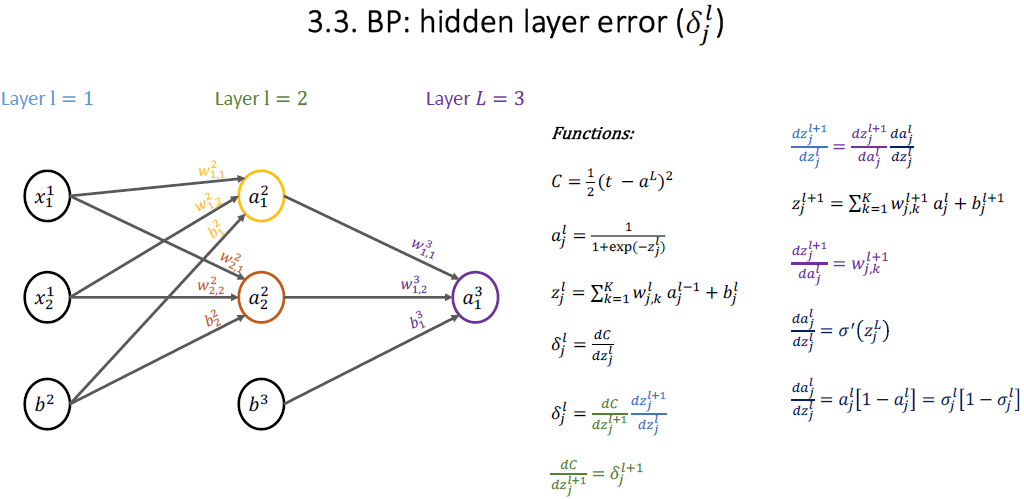
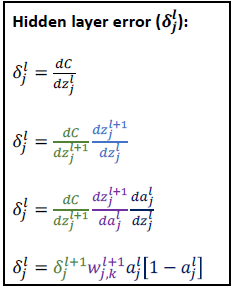 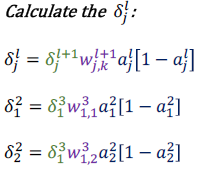

In [ ]:
##  3.3 BP: error de la capa oculta
#print('delta_list')
#print(delta_list)
#print('weights')
#print(weights[-1])
#print('a list')
#print(a_list[-2])
#print('sigmoid prime')
#print(sigmoid_prime(z_list[-2]))
#print('punto')
#print(np.dot(weights[-1],sigmoid_prime(z_list[-2].transpose())))
#print(delta_list[-1])
#print(sigmoid_prime(z_list[-2]))
delta_l = delta_list[-1]*weights[-1]*sigmoid_prime(z_list[-2]) # 1x1 1x2 o 1x2
print('delta_l')
print(delta_l)
#delta.append(delta_l)
delta_list.insert(0,delta_l) # como append, pero agrega el elemento al principio y desplaza los existentes
print('delta_list')
print(delta_list)
#print((target-activations[-1]))
#print(sigmoid_prime(z[-1]))
#print("delta_L = -({}-{})".format(target,activations[-1]),"* {}".format(sigmoid_prime(z[-1]))," = {}".format(delta_L))
#print("delta L = {}".format(delta))

delta_l
[[0.00497223 0.00487787]]
delta_list
[array([[0.00497223, 0.00487787]]), array([-0.09117306])]


#3.4 BP: calcular los pesos y bias de la capa oculta
###calcular los pesos ocultos
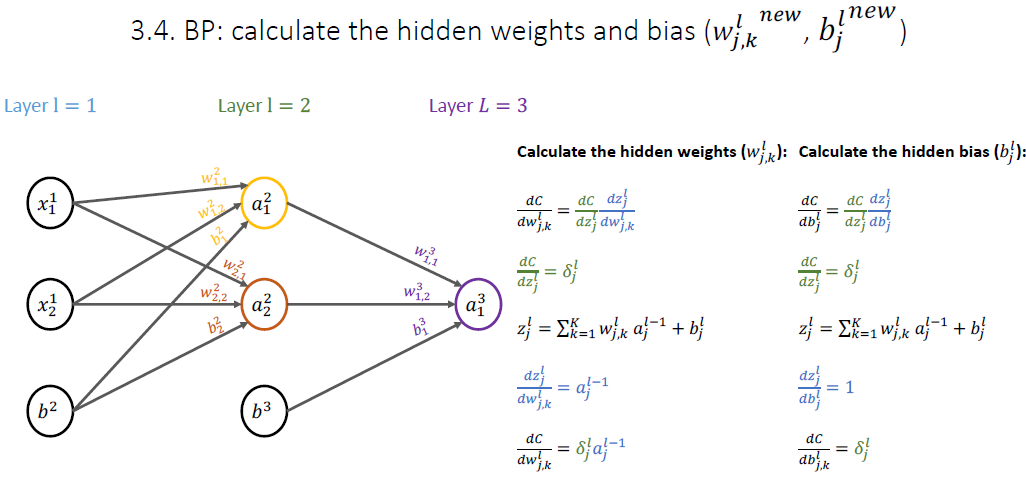 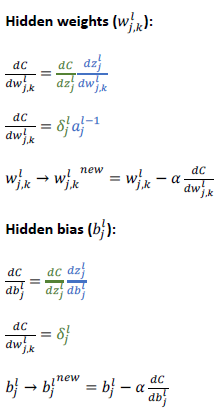 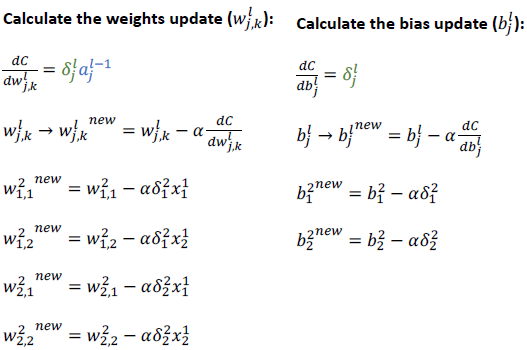


In [ ]:
# 3.4 BP: calcular los pesos y bias de la capa oculta
dC_dw[-2] = np.dot(delta_list[-2], a_list[-3]) #1x1 1x4 = 1x4
#print("dC_dw")
#print(dC_dw)
#print("weights[-2]")
#print(weights[-2])
w_new = weights[-2] - alpha*dC_dw[-2] # 2x2   [w_1,1^2][w_1,2^2][w_2,1^2][w_2,2^2] ---> new
print('new weights: ')
print(w_new)

dC_db[-2] = delta_list[-2] #1x1
#print("dc_db")
#print(dC_db[-2])
#print("biases[-2]")
#print(biases[-2])
b_new = biases[-2]  - alpha*dC_db[-2].transpose()   # [b_1^2] [b_2^2] --> new
print('new bias: ')
print(b_new)

#print("weights antes")
#print(weights)

#print("biases antes")
#print(biases)

biases[-2] = b_new   #1x1
weights[-2] = w_new  #1x2

print("weights despues")
print(weights)

print("biases despues")
print(biases)




new weights: 
[[ 0.0113725  -0.86849807]
 [-0.87924385  0.92000196]]
new bias: 
[[-0.37118832]
 [ 0.30618752]]
weights despues
[array([[ 0.0113725 , -0.86849807],
       [-0.87924385,  0.92000196]]), array([[-0.30922056, -0.22098369]])]
biases despues
[array([[-0.37118832],
       [ 0.30618752]]), array([[0.73279435]])]


In [ ]:
for l in range(2, num_layers):
    z = z_list[-l]
    #print(z)
    #sp = sigmoid_prime(z)
    #print(sp)
    #print(weights[-l+1].transpose()) #1x2^T-->2x1
    #print(delta) #1x1
    #print(np.dot(weights[-l+1].transpose(), delta).transpose()) #2x1^T-->1x2
    #print(sp) # 2x4
    #delta_L = -np.dot((target-activations[-1  ],sigmoid_prime(z[-1]))
    print("target")
    print(target)
    print("activations")
    print(activations)
    print(sigmoid_prime(z))
    delta =   -np.dot((target-activations[-l+1],sigmoid_prime(z))) #
    #delta =    np.dot(np.dot(weights[-l+1].transpose(), delta).transpose(), sp)
    #delta = np.dot(np.dot(weights[-l+1], delta), sp.transpose())
    #print(delta) #1x4
    nabla_b[-l] = delta
    nabla_w[-l] = np.dot(delta, activations[-l-1])
    #nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
#print(nabla_b)
#print(nabla_w)
# w_1,1^2 w_1,2^2 w_2,1^2 w_2,2^2
# b_1^2 b_2^2

target


NameError: ignored

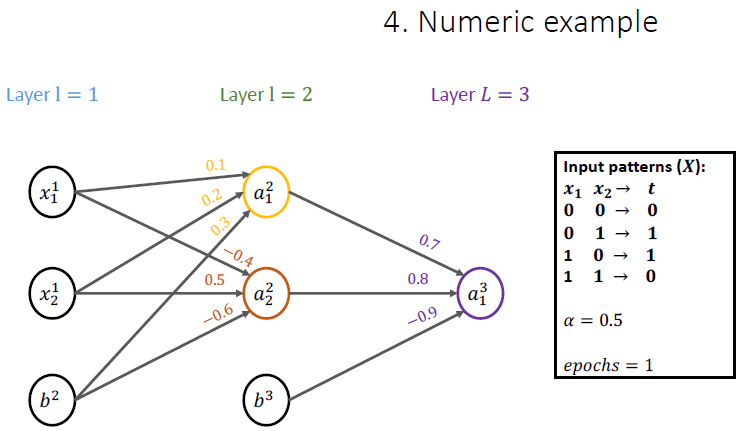